In [14]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

In [16]:
data = pd.read_csv(path, header=0)
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


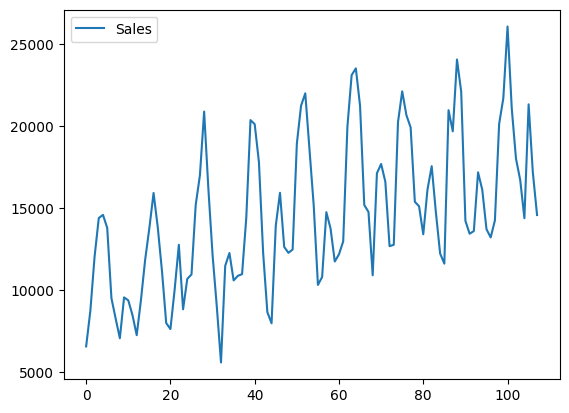

In [17]:
data.plot()
plt.show()

In [18]:
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])
data.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [19]:
model = Prophet(
    growth='linear',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10.0,
    seasonality_mode='additive'
)
model.fit(data)


15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:53:42 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# define the period for which we want a prediction
future = list()
for i in range(1,13):
    date= '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [21]:
forecast = model.predict(future)

In [22]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14319.554440  12747.048162  15904.119231
1 1968-02-01  14876.000043  13287.271407  16408.054617
2 1968-03-01  20839.079185  19287.336436  22433.815404
3 1968-04-01  22828.585094  21238.962222  24469.635576
4 1968-05-01  24109.775436  22580.070846  25753.150061


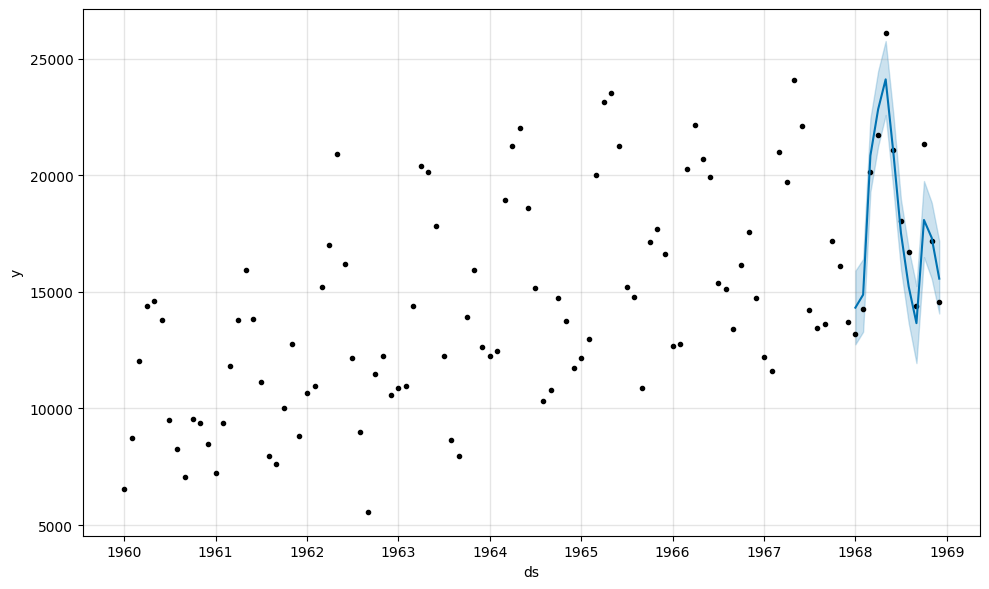

In [23]:
# plot forecast
model.plot(forecast)
plt.show()